<a href="https://colab.research.google.com/github/harrykelchner23/skills-github-pages/blob/main/MLS_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Who Deserves the 2024 MLS MVP Award?**

By Harrison Kelchner

In [24]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import iplot, init_notebook_mode
from geopy.geocoders import Nominatim
# Install chart-studio
!pip install chart_studio
# Import chart_studio.plotly instead of plotly.plotly
import chart_studio.plotly as py

**Step 1 - Load Data**

In [28]:
from google.colab import files
uploaded = files.upload()

Saving mls.csv to mls.csv


In [29]:
mls_data = pd.read_csv('mls.csv', low_memory=False, encoding='latin-1')

In [30]:
mls_data

,Player,Position,Team,Minutes,Goals,Assists,G+A,Goals/90,Assists/90,G+A/90
0,Liel Abada,FW,Charlotte,"1,637",7,1,8,0.38,0.05,0.44
1,Jose Casas de Abadal,"FW,DF",Inter Miami,31,0,0,0,0.00,0.00,0.00
2,Luis Abram,DF,Atlanta Utd,"1,102",0,0,0,0.00,0.00,0.00
3,Lalas Abubakar,DF,Colorado Rapids,"1,278",0,1,1,0.00,0.07,0.07
4,Kellyn Acosta,MF,Chicago Fire,"2,302",3,2,5,0.12,0.08,0.20
...,...,...,...,...,...,...,...,...,...,...
814,Sean Zawadzki,"MF,DF",Columbus Crew,"1,875",1,1,2,0.05,0.05,0.10
815,Walker Zimmerman,DF,Nashville SC,"1,927",1,1,2,0.05,0.05,0.09
816,Rida Zouhir,"MF,DF",CF Montral,178,0,0,0,0.00,0.00,0.00
817,Dario ?upari?,DF,Portland Timbers,"2,222",0,0,0,0.00,0.00,0.00


In [39]:
# Calculate the sum of 'G+A' for each team and divide by 34
team_goals_assists = mls_data.groupby('Team')['G+A'].sum() / 34
team_goals_assists

,G+A
Team,
Atlanta Utd,2.205882
Austin,2.000000
CF Montral,2.411765
Charlotte,2.323529
Chicago Fire,2.000000
Colorado Rapids,2.764706
Columbus Crew,3.647059
D.C. United,2.735294
FC Cincinnati,2.911765


**Step 2 - Clean Data**

Some players played more minutes than others, therefore we are using 'per 90 minutes' stats only.  However, because of this, we are only analyzing players who played a minimum of 1000 minutes (about ten games)

In [40]:
# Remove commas from the 'Minutes' column and convert to numeric
mls_data['Minutes'] = mls_data['Minutes'].astype(str).str.replace(',', '').astype(int)

# Filter out players with less than 1000 minutes
mls_data = mls_data[mls_data['Minutes'] >= 1000]

In [43]:
mls_data.head()

,Player,Position,Team,Minutes,Goals,Assists,G+A,Goals/90,Assists/90,G+A/90
0,Liel Abada,FW,Charlotte,1637,7,1,8,0.38,0.05,0.44
2,Luis Abram,DF,Atlanta Utd,1102,0,0,0,0.00,0.00,0.00
3,Lalas Abubakar,DF,Colorado Rapids,1278,0,1,1,0.00,0.07,0.07
4,Kellyn Acosta,MF,Chicago Fire,2302,3,2,5,0.12,0.08,0.20
5,Luciano Acosta,MF,FC Cincinnati,2704,14,16,30,0.47,0.53,1.00


Now lets clean up the table a bit.  We'll add a column thats shows each players total team G+A per game for the season

In [44]:
# Create a mapping of team names to their G+A values
team_ga_map = team_goals_assists.to_dict()

# Apply the mapping to create the new 'Team G+A' column
mls_data['Team G+A'] = mls_data['Team'].map(team_ga_map)

mls_data.head()

<ipython-input-44-65291af66818>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Player,Position,Team,Minutes,Goals,Assists,G+A,Goals/90,Assists/90,G+A/90,Team G+A
0,Liel Abada,FW,Charlotte,1637,7,1,8,0.38,0.05,0.44,2.323529
2,Luis Abram,DF,Atlanta Utd,1102,0,0,0,0.00,0.00,0.00,2.205882
3,Lalas Abubakar,DF,Colorado Rapids,1278,0,1,1,0.00,0.07,0.07,2.764706
4,Kellyn Acosta,MF,Chicago Fire,2302,3,2,5,0.12,0.08,0.20,2.000000
5,Luciano Acosta,MF,FC Cincinnati,2704,14,16,30,0.47,0.53,1.00,2.911765


Let's get rid of the columns we don't need anymore

In [45]:
# Keep only the specified columns
mls_data = mls_data[['Player', 'Team', 'G+A/90', 'Team G+A']]
mls_data.head()

,Player,Team,G+A/90,Team G+A
0,Liel Abada,Charlotte,0.44,2.323529
2,Luis Abram,Atlanta Utd,0.00,2.205882
3,Lalas Abubakar,Colorado Rapids,0.07,2.764706
4,Kellyn Acosta,Chicago Fire,0.20,2.000000
5,Luciano Acosta,FC Cincinnati,1.00,2.911765


Now let's add a column that shows how "valuable" the player is to their team, calculating what percent of their teams Goals+Assists they contributed to.  This gets rid of the biases caused by a decent player on a really good team having inflated stats, and vice versa.

In [46]:
mls_data['%contributions'] = mls_data['G+A/90'] / mls_data['Team G+A']
mls_data.head()

<ipython-input-46-8464054633b0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Player,Team,G+A/90,Team G+A,%contributions
0,Liel Abada,Charlotte,0.44,2.323529,0.189367
2,Luis Abram,Atlanta Utd,0.00,2.205882,0.000000
3,Lalas Abubakar,Colorado Rapids,0.07,2.764706,0.025319
4,Kellyn Acosta,Chicago Fire,0.20,2.000000,0.100000
5,Luciano Acosta,FC Cincinnati,1.00,2.911765,0.343434


**Step 3 - View and Analyze Data**

In [54]:
# Sort the DataFrame by '%contributions' in descending order and display the top 10 players
top_10_players = mls_data.sort_values('%contributions', ascending=False).head(10)
top_10_players

,Player,Team,G+A/90,Team G+A,%contributions
476,Lionel Messi,Inter Miami,1.87,4.205882,0.444615
454,Alonso Mart¡nez,NYCFC,1.15,2.705882,0.425000
544,Tani Oluwaseyi,Minnesota Utd,1.08,2.764706,0.390638
456,Josef Mart¡nez,CF Montral,0.92,2.411765,0.381463
85,Christian Benteke,D.C. United,0.97,2.735294,0.354624
5,Luciano Acosta,FC Cincinnati,1.00,2.911765,0.343434
182,Cucho,Columbus Crew,1.24,3.647059,0.340000
652,Albert Rusn k,Seattle Sounders FC,0.78,2.352941,0.331500
260,Emil Forsberg,NY Red Bulls,0.86,2.617647,0.328539
238,Evander,Portland Timbers,1.10,3.382353,0.325217


<ipython-input-61-5d8eda14afc3>:40: UserWarning:

Glyph 130 (\x82) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 130 (\x82) missing from font(s) DejaVu Sans.



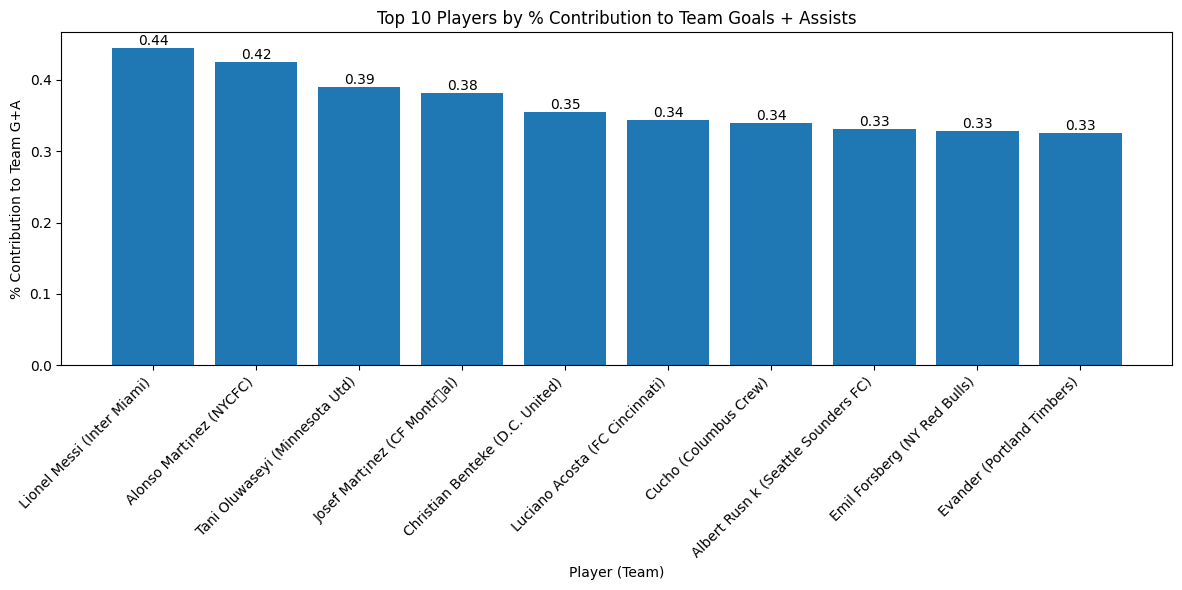

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode
from geopy.geocoders import Nominatim
import chart_studio.plotly as py
from google.colab import files
# **Who Deserves the 2024 MLS MVP Award?**
# Import libraries

%matplotlib inline

# Install chart-studio
# !pip install chart-studio # Assuming it's already installed

# Import chart_studio.plotly instead of plotly.plotly
# **Step 1 - Load Data**
# uploaded = files.upload() # Assuming data is already loaded
# mls_data = pd.read_csv('mls.csv', low_memory=False, encoding='latin-1')
# mls_data

# ... (rest of existing code up to the top_10_players DataFrame)

# Create the bar chart using matplotlib
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_players['Player'] + ' (' + top_10_players['Team'] + ')', top_10_players['%contributions'])
plt.xlabel("Player (Team)")
plt.ylabel("% Contribution to Team G+A")
plt.title("Top 10 Players by % Contribution to Team Goals + Assists")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

**Conclusions**

-Lionel Messi is deserving of the 2024 MLS MVP award

-4 of the 5 nominees were in the top ten of our model

-Other stats can be used as well.  This model chose to use goals and assists